<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/images/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

<h1 align="center"><font size="5">Classification with Python</font></h1>


In this notebook we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Let's first load required libraries:


In [64]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.ticker as ticker
from matplotlib.ticker import NullFormatter
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

In [65]:
import warnings 
warnings.filterwarnings('ignore')

### About dataset


This dataset is about past loans. The **Loan_train.csv** data set includes details of 346 customers whose loan are already paid off or defaulted. It includes following fields:

| Field          | Description                                                                           |
| -------------- | ------------------------------------------------------------------------------------- |
| Loan_status    | Whether a loan is paid off on in collection                                           |
| Principal      | Basic principal loan amount at the                                                    |
| Terms          | Origination terms which can be weekly (7 days), biweekly, and monthly payoff schedule |
| Effective_date | When the loan got originated and took effects                                         |
| Due_date       | Since it’s one-time payoff schedule, each loan has one single due date                |
| Age            | Age of applicant                                                                      |
| Education      | Education of applicant                                                                |
| Gender         | The gender of applicant                                                               |


Let's download the dataset


In [66]:
!wget -O loan_train.csv https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv

--2021-09-01 09:05:37--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/loan_train.csv
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 23101 (23K) [text/csv]
Saving to: ‘loan_train.csv’

loan_train.csv      100%[===================>]  22.56K  --.-KB/s    in 0s      

2021-09-01 09:05:37 (145 MB/s) - ‘loan_train.csv’ saved [23101/23101]



### Load Data From CSV File


In [67]:
df = pd.read_csv('loan_train.csv')
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [68]:
df.shape

(346, 10)

### Convert to date time object


In [69]:
df['due_date'] = pd.to_datetime(df['due_date'])
df['effective_date'] = pd.to_datetime(df['effective_date'])
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male


# Data visualization and pre-processing


Let’s see how many of each class is in our data set


In [70]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

260 people have paid off the loan on time while 86 have gone into collection


Let's plot some columns to underestand data better:


In [71]:
# notice: installing seaborn might takes a few minutes
!conda install -c anaconda seaborn -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.8-main

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.10.14 |                0         128 KB  anaconda
    certifi-2020.6.20          |           py38_0         160 KB  anaconda
    seaborn-0.11.0             |             py_0         216 KB  anaconda
    ------------------------------------------------------------
                                           Total:         503 KB

The following packages will be SUPERSEDED by a higher-priority channel:

  ca-certificates    conda-forge::ca-certificates-2021.5.3~ --> anaconda::ca-certificates-2020.10.14-0
  certifi            conda-forge::certifi-2021.5.30-py38h5~ --> anaconda::certifi-2020.6.20-py38_0
  seaborn            pkgs/main::seaborn-0.11.1-pyhd3eb1b0_0 --> anaconda::seabor

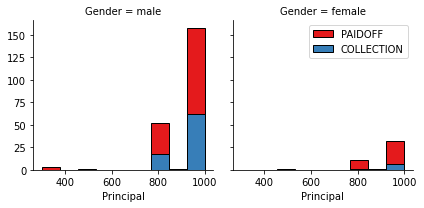

In [72]:
import seaborn as sns

bins = np.linspace(df.Principal.min(), df.Principal.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'Principal', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

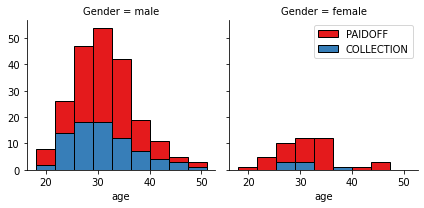

In [73]:
bins = np.linspace(df.age.min(), df.age.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'age', bins=bins, ec="k")

g.axes[-1].legend()
plt.show()

# Pre-processing:  Feature selection/extraction


### Let's look at the day of the week people get the loan


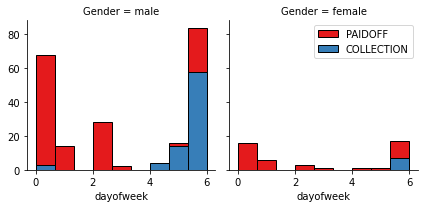

In [74]:
df['dayofweek'] = df['effective_date'].dt.dayofweek
bins = np.linspace(df.dayofweek.min(), df.dayofweek.max(), 10)
g = sns.FacetGrid(df, col="Gender", hue="loan_status", palette="Set1", col_wrap=2)
g.map(plt.hist, 'dayofweek', bins=bins, ec="k")
g.axes[-1].legend()
plt.show()


We see that people who get the loan at the end of the week don't pay it off, so let's use Feature binarization to set a threshold value less than day 4


In [75]:
df['weekend'] = df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,male,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,female,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,male,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,female,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,male,4,1


## Convert Categorical features to numerical values


Let's look at gender:


In [76]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)

Gender  loan_status
female  PAIDOFF        0.865385
        COLLECTION     0.134615
male    PAIDOFF        0.731293
        COLLECTION     0.268707
Name: loan_status, dtype: float64

86 % of female pay there loans while only 73 % of males pay there loan


Let's convert male to 0 and female to 1:


In [77]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender,dayofweek,weekend
0,0,0,PAIDOFF,1000,30,2016-09-08,2016-10-07,45,High School or Below,0,3,0
1,2,2,PAIDOFF,1000,30,2016-09-08,2016-10-07,33,Bechalor,1,3,0
2,3,3,PAIDOFF,1000,15,2016-09-08,2016-09-22,27,college,0,3,0
3,4,4,PAIDOFF,1000,30,2016-09-09,2016-10-08,28,college,1,4,1
4,6,6,PAIDOFF,1000,30,2016-09-09,2016-10-08,29,college,0,4,1


## One Hot Encoding

#### How about education?


In [78]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)

education             loan_status
Bechalor              PAIDOFF        0.750000
                      COLLECTION     0.250000
High School or Below  PAIDOFF        0.741722
                      COLLECTION     0.258278
Master or Above       COLLECTION     0.500000
                      PAIDOFF        0.500000
college               PAIDOFF        0.765101
                      COLLECTION     0.234899
Name: loan_status, dtype: float64

#### Features before One Hot Encoding


In [79]:
df[['Principal','terms','age','Gender','education']].head()

,Principal,terms,age,Gender,education
0,1000,30,45,0,High School or Below
1,1000,30,33,1,Bechalor
2,1000,15,27,0,college
3,1000,30,28,1,college
4,1000,30,29,0,college


#### Use one hot encoding technique to conver categorical varables to binary variables and append them to the feature Data Frame


In [80]:
Feature = df[['Principal','terms','age','Gender','weekend']]
Feature = pd.concat([Feature,pd.get_dummies(df['education'])], axis=1)
Feature.drop(['Master or Above'], axis = 1,inplace=True)
Feature.head()


,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


### Feature Selection


Let's define feature sets, X:


In [81]:
X = Feature
X[0:5]

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,45,0,0,0,1,0
1,1000,30,33,1,0,1,0,0
2,1000,15,27,0,0,0,0,1
3,1000,30,28,1,1,0,0,1
4,1000,30,29,0,1,0,0,1


What are our labels?


In [82]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

## Normalize Data


Data Standardization give data zero mean and unit variance (technically should be done after train test split)


In [83]:
X= preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555, -0.42056004, -1.20577805,
        -0.38170062,  1.13639374, -0.86968108],
       [ 0.51578458,  0.92071769,  0.34170148,  2.37778177, -1.20577805,
         2.61985426, -0.87997669, -0.86968108],
       [ 0.51578458, -0.95911111, -0.65321055, -0.42056004, -1.20577805,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.48739188,  2.37778177,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.42056004,  0.82934003,
        -0.38170062, -0.87997669,  1.14984679]])

# Classification


Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model
You should use the following algorithm:

*   K Nearest Neighbor(KNN)
*   Decision Tree
*   Support Vector Machine
*   Logistic Regression

\__ Notice:\__

*   You can go above and change the pre-processing, feature selection, feature-extraction, and so on, to make a better model.
*   You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
*   You should include the code of the algorithm in the following cells.


# K Nearest Neighbor(KNN)

Notice: You should find the best k to build the model with the best accuracy.\
**warning:** You should not use the **loan_test.csv** for finding the best k, however, you can split your train_loan.csv into train and test to find the best **k**.


In [84]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print('Train set:', X_train.shape, y_train.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set: (276, 8) (276,)
Test set: (70, 8) (70,)


In [85]:
# build KNN with different k and evaluate with accuracy score on "test set"
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# try k from 1 to 10
Ks = 10
mean_acc = np.zeros((Ks))
std_acc = np.zeros((Ks))

for n in range(1, Ks + 1):
    neigh = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    yhat = neigh.predict(X_test)
    
    mean_acc[n - 1] = accuracy_score(y_test, yhat)
    std_acc[n - 1] = np.std(yhat==y_test) / np.sqrt(yhat.shape[0])
mean_acc

array([0.67142857, 0.65714286, 0.71428571, 0.68571429, 0.75714286,
       0.71428571, 0.78571429, 0.75714286, 0.75714286, 0.67142857])

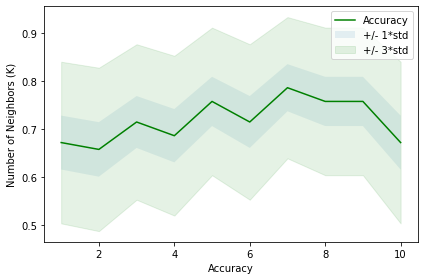

In [86]:
# plot to visualize and find the best k to build the model with the best accuracy
plt.plot(range(1, Ks + 1), mean_acc, 'g')
plt.fill_between(range(1, Ks + 1), mean_acc - 1 * std_acc, mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1, Ks + 1), mean_acc - 3 * std_acc, mean_acc + 3 * std_acc, alpha=0.10, color='green')
plt.legend(('Accuracy', '+/- 1*std', '+/- 3*std'))
plt.xlabel('Accuracy')
plt.ylabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [87]:
print('The best accuracy score for K Nearest Neighbor is', mean_acc.max(), 'with k = ', mean_acc.argmax() + 1)

The best accuracy score for K Nearest Neighbor is 0.7857142857142857 with k =  7


In [88]:
# finally choose the K Nearest Neighbor using the best k with highest accuracy
best_knn = KNeighborsClassifier(n_neighbors=7).fit(X_train, y_train)

# Decision Tree


In [89]:
# build the decision tree classifier, use 5 fold gridsearchCV to find the best parameter set
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

tree_mdl = DecisionTreeClassifier()
tree_params = {'criterion': ['gini', 'entropy'], 'max_depth': [i for i in range(2, 10)]}
tree_grid = GridSearchCV(tree_mdl, tree_params, cv=5, scoring='accuracy')
tree_grid.fit(X, y)

best_tree = tree_grid.best_estimator_
print('The best parameter set for decisioin tree classifier: ', tree_grid.best_params_)
print('The Mean cross-validated score for the best decisioin tree classifier: ', tree_grid.best_score_)

The best parameter set for decisioin tree classifier:  {'criterion': 'gini', 'max_depth': 9}
The Mean cross-validated score for the best decisioin tree classifier:  0.6852587991718426


#### Visualization

In [28]:
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python-3.8-main

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2021.5.30          |   py38h578d9bd_0         141 KB  conda-forge
    openssl-1.1.1k             |       h7f98852_0         2.1 MB  conda-forge
    pydotplus-2.0.2            |             py_1          22 KB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         2.3 MB

The following NEW packages will be INSTALLED:

  pydotplus          conda-forge/noarch::pydotplus-2.0.2-py_1
  python_abi         conda-forge/linux-64::python_abi-3.8-2_cp38

The following packages will be SUPERSEDED by a higher-priority channel:

  certifi         

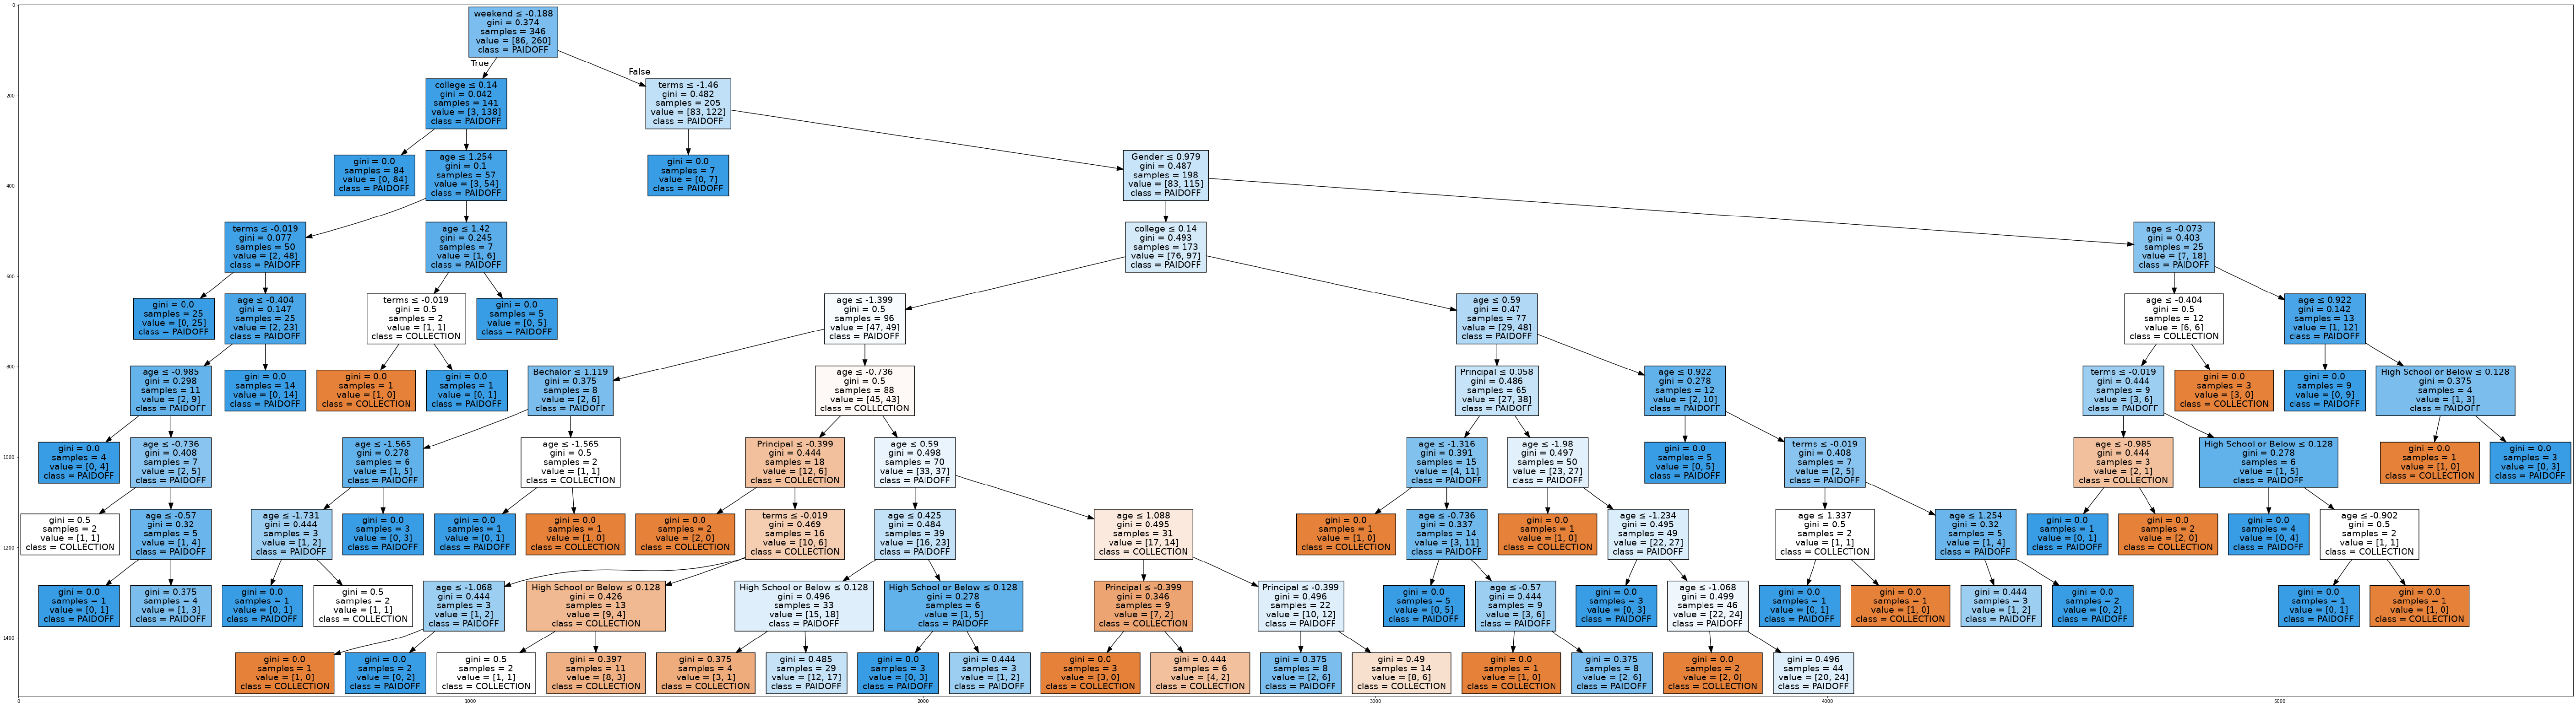

In [29]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

dot_data = StringIO()
filename = 'DecisionTree_LoanClassifier.png'
featureNames = Feature.columns.values
out = tree.export_graphviz(best_tree, feature_names=featureNames, out_file=dot_data, class_names=np.unique(y_train), filled=True, special_characters=True, rotate=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img, interpolation='nearest')


# Support Vector Machine


In [90]:
# build the Support Vector Machine with different penalty and kernels, use 5 fold gridsearchCV to find the best parameter set
from sklearn.svm import SVC

clf_mdl = SVC()
clf_params = {'C': list(np.logspace(-5, 5, 11)), 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}
clf_grid = GridSearchCV(clf_mdl, clf_params, cv=5, scoring='accuracy')
clf_grid.fit(X, y)

best_svm = clf_grid.best_estimator_
print('The best parameter set for Support Vector Machine: ', clf_grid.best_params_)
print('The Mean cross-validated score for the best Support Vector Machine: ', clf_grid.best_score_)

The best parameter set for Support Vector Machine:  {'C': 1e-05, 'kernel': 'linear'}
The Mean cross-validated score for the best Support Vector Machine:  0.7514699792960663


In [ ]:
# Finally using {'C': 1e-05, 'kernel': 'linear'}

# Logistic Regression


In [91]:
# build the Logistic Regression with different regularization and solvers, use 5 fold gridsearchCV to find the best parameter set
from sklearn.linear_model import LogisticRegression

lr_mdl = LogisticRegression()
lr_params = {'C': list(np.logspace(-5, 5, 11)), 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}
lr_grid = GridSearchCV(lr_mdl, lr_params, cv=5, scoring='accuracy')
lr_grid.fit(X, y)

best_lr = lr_grid.best_estimator_
print('The best parameter set for Logistic Regression: ', lr_grid.best_params_)
print('The Mean cross-validated score for the best Logistic Regression: ', lr_grid.best_score_)

The best parameter set for Logistic Regression:  {'C': 1e-05, 'solver': 'newton-cg'}
The Mean cross-validated score for the best Logistic Regression:  0.7514699792960663


In [92]:
# Finally using {'C': 1e-05, 'solver': 'newton-cg'}

# Model Evaluation using Test set


In [93]:
from sklearn.metrics import jaccard_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss


First, download and load the test set:


In [94]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

--2021-09-01 09:14:24--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3642 (3.6K) [text/csv]
Saving to: ‘loan_test.csv’

loan_test.csv       100%[===================>]   3.56K  --.-KB/s    in 0s      

2021-09-01 09:14:25 (77.4 MB/s) - ‘loan_test.csv’ saved [3642/3642]



### Load Test set for evaluation


In [95]:
test_df = pd.read_csv('loan_test.csv')
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [96]:
test_df.shape

(54, 10)

In [97]:
test_df.dtypes

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object

### Transform the test set to features

In [98]:
# Convert to date time object
test_df['due_date'] = pd.to_datetime(test_df['due_date'])
test_df['effective_date'] = pd.to_datetime(test_df['effective_date'])
test_df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,2016-09-08,2016-10-07,50,Bechalor,female
1,5,5,PAIDOFF,300,7,2016-09-09,2016-09-15,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,2016-09-10,2016-10-09,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,2016-09-10,2016-10-09,26,college,male
4,35,35,PAIDOFF,800,15,2016-09-11,2016-09-25,29,Bechalor,male


In [99]:
# Feature selection/extraction
test_df['dayofweek'] = test_df['effective_date'].dt.dayofweek
test_df['weekend'] = test_df['dayofweek'].apply(lambda x: 1 if (x>3)  else 0)

In [100]:
# Convert Categorical features to numerical values
test_df['Gender'].replace(to_replace=['male','female'], value=[0,1], inplace=True)
# One Hot Encoding
test_Feature = test_df[['Principal','terms','age','Gender','weekend']]
test_Feature = pd.concat([test_Feature, pd.get_dummies(test_df['education'])], axis=1)
test_Feature.drop(['Master or Above'], axis = 1,inplace=True)
test_Feature.head()

,Principal,terms,age,Gender,weekend,Bechalor,High School or Below,college
0,1000,30,50,1,0,1,0,0
1,300,7,35,0,1,0,0,0
2,1000,30,43,1,1,0,1,0
3,1000,30,26,0,1,0,0,1
4,800,15,29,0,1,1,0,0


In [101]:
# Feature and response/target for test set
test_X = test_Feature
test_y = test_df['loan_status'].values

# Normalize Data
test_X = preprocessing.StandardScaler().fit(test_X).transform(test_X)

### Evalaute different models on test set

In [102]:
# 1. KNN
yhat_knn = best_knn.predict(test_X)

f1_knn = f1_score(test_y, yhat_knn, average='weighted')
jac_knn = jaccard_score(test_y, yhat_knn, pos_label='PAIDOFF')

print("Avg F1-score for KNN: %.4f" % f1_knn)
print("Jaccard score for KNN: %.4f" % jac_knn)

Avg F1-score for KNN: 0.6328
Jaccard score for KNN: 0.6538


In [103]:
# 2. Decision Tree
yhat_tree = best_tree.predict(test_X)

f1_tree = f1_score(test_y, yhat_tree, average='weighted')
jac_tree = jaccard_score(test_y, yhat_tree, pos_label='PAIDOFF')

print("Avg F1-score for Decision Tree: %.4f" % f1_tree)
print("Jaccard score for Decision Tree: %.4f" % jac_tree)

Avg F1-score for Decision Tree: 0.7253
Jaccard score for Decision Tree: 0.7143


In [104]:
# 3. SVM
yhat_svm = best_svm.predict(test_X)

f1_svm = f1_score(test_y, yhat_svm, average='weighted')
jac_svm = jaccard_score(test_y, yhat_svm, pos_label='PAIDOFF')

print("Avg F1-score for SVM: %.4f" % f1_svm)
print("Jaccard score for SVM: %.4f" % jac_svm)

Avg F1-score for SVM: 0.6304
Jaccard score for SVM: 0.7407


In [105]:
# 4. Logistic Regression
yhat_LR = best_lr.predict(test_X)
yhat_probLR = best_lr.predict_proba(test_X)

f1_LR = f1_score(test_y, yhat_LR, average='weighted')
jac_LR = jaccard_score(test_y, yhat_LR, pos_label='PAIDOFF')
logloss_LR = log_loss(test_y, yhat_probLR)

print("Avg F1-score for Logistic Regression: %.4f" % f1_LR)
print("Jaccard score for Logistic Regression: %.4f" % jac_LR)
print ("LogLoss for Logistic Regression: %.2f" % logloss_LR)


Avg F1-score for Logistic Regression: 0.6304
Jaccard score for Logistic Regression: 0.7407
LogLoss for Logistic Regression: 0.57


### Summary Report

In [106]:
report = pd.DataFrame(columns=['Jaccard', 'F1-score', 'LogLoss'])
report.at['KNN', :] = [jac_knn, f1_knn, np.nan]
report.at['Decision Tree', :] = [jac_tree, f1_tree, np.nan]
report.at['SVM', :] = [jac_svm, f1_svm, np.nan]
report.at['LogisticRegression', :] = [jac_LR, f1_LR, logloss_LR]
report.index.name = 'Algorithm'
report.reset_index(inplace=True)

In [107]:
report 

,Algorithm,Jaccard,F1-score,LogLoss
0,KNN,0.653846,0.63284,NaN
1,Decision Tree,0.714286,0.725309,NaN
2,SVM,0.740741,0.630418,NaN
3,LogisticRegression,0.740741,0.630418,0.572465


In [108]:
# check the confusion_matrix and classification_report
from sklearn.metrics import confusion_matrix, classification_report

cm_knn = confusion_matrix(test_y, yhat_knn, labels=['COLLECTION', 'PAIDOFF'])
cm_tree = confusion_matrix(test_y, yhat_tree, labels=['COLLECTION', 'PAIDOFF'])
cm_svm = confusion_matrix(test_y, yhat_svm, labels=['COLLECTION', 'PAIDOFF'])
cm_LR = confusion_matrix(test_y, yhat_LR, labels=['COLLECTION', 'PAIDOFF'])

cr_knn = classification_report(test_y, yhat_knn)
cr_tree = classification_report(test_y, yhat_tree)
cr_svm = classification_report(test_y, yhat_svm)
cr_LR = classification_report(test_y, yhat_LR)

print('Confusion matrix for KNN: \n', cm_knn)
print('Classification report for KNN: \n', cr_knn)

print('Confusion matrix for Decision Tree: \n', cm_tree)
print('Classification report for Decision Tree: \n', cr_tree)

print('Confusion matrix for SVM: \n', cm_svm)
print('Classification report for SVM: \n', cr_svm)

print('Confusion matrix for Logistic Regression: \n', cm_LR)
print('Classification report for Logistic Regression: \n', cr_LR)

Confusion matrix for KNN: 
 [[ 2 12]
 [ 6 34]]
Classification report for KNN: 
               precision    recall  f1-score   support

  COLLECTION       0.25      0.14      0.18        14
     PAIDOFF       0.74      0.85      0.79        40

    accuracy                           0.67        54
   macro avg       0.49      0.50      0.49        54
weighted avg       0.61      0.67      0.63        54

Confusion matrix for Decision Tree: 
 [[ 5  9]
 [ 5 35]]
Classification report for Decision Tree: 
               precision    recall  f1-score   support

  COLLECTION       0.50      0.36      0.42        14
     PAIDOFF       0.80      0.88      0.83        40

    accuracy                           0.74        54
   macro avg       0.65      0.62      0.62        54
weighted avg       0.72      0.74      0.73        54

Confusion matrix for SVM: 
 [[ 0 14]
 [ 0 40]]
Classification report for SVM: 
               precision    recall  f1-score   support

  COLLECTION       0.00      0.

In [109]:
# Decision tree is the best model amongst the four tested classifiers with best F1-score and relative high Jaccard score, while SVM and Logistic Regression tend to misclassify all collection to paidoff

# Report

You should be able to report the accuracy of the built model using different evaluation metrics:


| Algorithm          | Jaccard | F1-score | LogLoss |
| ------------------ | ------- | -------- | ------- |
| KNN                | ?       | ?        | NA      |
| Decision Tree      | ?       | ?        | NA      |
| SVM                | ?       | ?        | NA      |
| LogisticRegression | ?       | ?        | ?       |


<h2>Want to learn more?</h2>

IBM SPSS Modeler is a comprehensive analytics platform that has many machine learning algorithms. It has been designed to bring predictive intelligence to decisions made by individuals, by groups, by systems – by your enterprise as a whole. A free trial is available through this course, available here: <a href="http://cocl.us/ML0101EN-SPSSModeler?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">SPSS Modeler</a>

Also, you can use Watson Studio to run these notebooks faster with bigger datasets. Watson Studio is IBM's leading cloud solution for data scientists, built by data scientists. With Jupyter notebooks, RStudio, Apache Spark and popular libraries pre-packaged in the cloud, Watson Studio enables data scientists to collaborate on their projects without having to install anything. Join the fast-growing community of Watson Studio users today with a free account at <a href="https://cocl.us/ML0101EN_DSX?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Watson Studio</a>

<h3>Thanks for completing this lesson!</h3>

<h4>Author:  <a href="https://ca.linkedin.com/in/saeedaghabozorgi?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2021-01-01">Saeed Aghabozorgi</a></h4>
<p><a href="https://ca.linkedin.com/in/saeedaghabozorgi">Saeed Aghabozorgi</a>, PhD is a Data Scientist in IBM with a track record of developing enterprise level applications that substantially increases clients’ ability to turn data into actionable knowledge. He is a researcher in data mining field and expert in developing advanced analytic methods like machine learning and statistical modelling on large datasets.</p>

<hr>

## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description                                                             |
| ----------------- | ------- | ------------- | ------------------------------------------------------------------------------ |
| 2020-10-27        | 2.1     | Lakshmi Holla | Made changes in import statement due to updates in version of  sklearn library |
| 2020-08-27        | 2.0     | Malika Singla | Added lab to GitLab                                                            |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
